In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import scipy.stats as stats

# to divide train and test set
from sklearn.model_selection import train_test_split

#for feature scaling
from sklearn.preprocessing import MinMaxScaler

# to save the trained scaler class
import joblib

#to visualise all the columns in the datframe

pd.set_option('display.max_columns', None)

Set the random seed

In [26]:
np.random.seed(0)

In [401]:
data= pd.read_csv(r'/Users/saurabhverma/Downloads/train.csv')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [402]:
data.shape

(1460, 81)

Separating dataset into test and tarin

In [403]:
X=data.iloc[:,:-1]
y=data.iloc[:,-1]

In [404]:
data[['Id','SalePrice']]

,Id,SalePrice
0,1,208500
1,2,181500
2,3,223500
3,4,140000
4,5,250000
...,...,...
1455,1456,175000
1456,1457,210000
1457,1458,266500
1458,1459,142125


In [405]:
xtrain, xtest, ytrain, ytest = train_test_split(X,y, test_size=0.2, random_state=42)

In [406]:
xtrain, xtest, ytrain, ytest = train_test_split(data.drop(['Id','SalePrice'], axis=1),
                                                data['SalePrice'],
                                                test_size=0.2, 
                                                random_state=0)
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((1168, 79), (292, 79), (1168,), (292,))

In [407]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [408]:
cat_variables=list(data.select_dtypes('object').columns) + ['MSSubClass']

In [409]:
cat_variables

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition',
 'MSSubClass']

Convert the dtypes in xtrain and xtest

In [410]:
xtrain[cat_variables]= xtrain[cat_variables].astype('O')
xtest[cat_variables]= xtest[cat_variables].astype('O')

Next step is to change the distribution of the y to log to make is more gaussian

In [411]:
ytrain= np.log(ytrain)
ytest= np.log(ytest)

In [412]:
(data[cat_variables].isna().sum() > 0)[(data[cat_variables].isna().sum() > 0)].index

Index(['Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC',
       'Fence', 'MiscFeature'],
      dtype='object')

In [413]:
cat_variables_with_nulls=data[cat_variables].isna().any()[data[cat_variables].isna().any()].index

In [414]:
cat_variables_with_nulls = xtrain[cat_variables].isna().any(axis=0)
cat_variables_with_nulls = cat_variables_with_nulls[cat_variables_with_nulls].index


In [415]:
# So we have null values and rare lables in categorical variables

# First we will see the extent of null values in each columns
xtrain[cat_variables_with_nulls].apply(lambda col: 1.0*col.isna().sum()/len(col) )

Alley           0.939212
MasVnrType      0.605308
BsmtQual        0.023973
BsmtCond        0.023973
BsmtExposure    0.023973
BsmtFinType1    0.023973
BsmtFinType2    0.024829
Electrical      0.000856
FireplaceQu     0.471747
GarageType      0.049658
GarageFinish    0.049658
GarageQual      0.049658
GarageCond      0.049658
PoolQC          0.996575
Fence           0.816781
MiscFeature     0.958048
dtype: float64

In [416]:
# Method 2

def percentage_of_null_values(col):
    # return 1.0*col.isna().sum()/len(col)
    return col.isna().mean()

xtrain[cat_variables_with_nulls].apply(percentage_of_null_values)

Alley           0.939212
MasVnrType      0.605308
BsmtQual        0.023973
BsmtCond        0.023973
BsmtExposure    0.023973
BsmtFinType1    0.023973
BsmtFinType2    0.024829
Electrical      0.000856
FireplaceQu     0.471747
GarageType      0.049658
GarageFinish    0.049658
GarageQual      0.049658
GarageCond      0.049658
PoolQC          0.996575
Fence           0.816781
MiscFeature     0.958048
dtype: float64

In [417]:
# Imputing 'missing values' string in columns with more than threshold null value percentage, for other fill with the highest appearing value

impute_with_missing_value= [var for var in cat_variables_with_nulls if percentage_of_null_values(xtrain[var])> 0.1]

impute_with_frequent_value= [var for var in cat_variables_with_nulls if percentage_of_null_values(xtrain[var]) <= 0.1]


In [418]:
impute_with_missing_values= [var for var in cat_variables_with_nulls if 1.0*xtrain[var].isna().sum()/len(xtrain[var])> 0.1]

impute_with_frequent_values= [var for var in cat_variables_with_nulls if 1.0*xtrain[var].isna().sum()/len(xtrain[var]) <= 0.1]

In [419]:
xtrain[impute_with_missing_values]=xtrain[impute_with_missing_values].fillna('missing_value') # this can be done in a line
xtest[impute_with_missing_values]=xtest[impute_with_missing_values].fillna('missing_value')



In [420]:

xtrain[impute_with_frequent_values]= xtrain[impute_with_frequent_values].apply(lambda col : col.fillna(col.mode()[0])) # But this rewuires apply function or loop
xtest[impute_with_frequent_values]=xtest[impute_with_frequent_values].apply(lambda col : col.fillna(col.mode()[0]))

Some notes:
apply van happen to both single column or a dataframe
In case of dataframe apply takes in both a well defined function or a lambda function.
The well defined function if intended to be applied on a datframe takes in col and then operates a column method, not on individual element of the column

In the same spirit, lambda function also takes in column ad operates on the full column


But apply for a indiviual column works slightly different. If we want to perform a well defined function on a single column. 'apply' is not used. Instead the function is directly called with df['col'] as the input.

If we want to apply lambda function, it will be wrong as the function will take in item of the col and perform item wise, which is not intended.

Numerical variables

In [421]:
numerical_cols= list(xtrain.select_dtypes(['int', 'float']))
# numerical_values.remove('MSSubClass')
numerical_cols

['LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

Some of the numerical columns are year columns too.

In [422]:
temporal_columns = [var for var in numerical_cols if 'Yr' in var or 'Year' in var]

In [423]:
temporal_columns

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [424]:
actual_numerical_cols= [var for var in numerical_cols if var not in temporal_columns]
actual_numerical_cols

['LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold']

In [425]:
xtrain[actual_numerical_cols].apply(lambda col: len(col.unique())).sort_values()

HalfBath           3
BsmtHalfBath       3
FullBath           4
Fireplaces         4
KitchenAbvGr       4
BsmtFullBath       4
PoolArea           5
GarageCars         5
BedroomAbvGr       8
OverallCond        9
OverallQual       10
TotRmsAbvGrd      12
MoSold            12
3SsnPorch         18
LowQualFinSF      21
MiscVal           21
ScreenPorch       66
LotFrontage      105
EnclosedPorch    107
BsmtFinSF2       120
OpenPorchSF      185
WoodDeckSF       240
MasVnrArea       283
2ndFlrSF         357
GarageArea       400
BsmtFinSF1       551
TotalBsmtSF      623
1stFlrSF         666
BsmtUnfSF        687
GrLivArea        741
LotArea          891
dtype: int64

In [426]:
discrete_numerical_cols = [var for var in actual_numerical_cols if len(xtrain[var].unique()) < 22]
continuous_numerical_cols = [var for var in actual_numerical_cols if var not in discrete_numerical_cols]

There are some discrete numerical values and some continuous values

Checking for null values in all of temporal_cols, discrete_cols, and continuous_cols

In [427]:
xtrain[temporal_columns].isna().sum()/len(xtrain)

YearBuilt       0.000000
YearRemodAdd    0.000000
GarageYrBlt     0.049658
YrSold          0.000000
dtype: float64

In [428]:
xtrain[temporal_columns].isna().sum() > 0

YearBuilt       False
YearRemodAdd    False
GarageYrBlt      True
YrSold          False
dtype: bool

In [429]:
temporal_cols_with_nulls= [var for var in temporal_columns if xtrain[var].isna().sum() > 0 ]


In [430]:
for var in temporal_cols_with_nulls:
    xtrain[var+'na'] = np.where(xtrain[var].isna(), 1, 0)
    xtest[var+'na'] = np.where(xtest[var].isna(), 1, 0)
    # xtrain[var]= xtrain[var].apply(lambda col : col.fillna(col.mode()[0])) #this will not be applicable here
    # xtest[var]= xtest[var].apply(lambda col : col.fillna(col.mode()[0])) #this will not be applicable here

    xtrain[var]= xtrain[var].fillna(xtrain[var].mode()[0])
    xtest[var]= xtrain[var].fillna(xtest[var].mode()[0])

In [431]:
# xtrain[temporal_cols_with_nulls].mode()

In [432]:
xtrain[discrete_numerical_cols].isna().sum()/len(xtrain)

OverallQual     0.0
OverallCond     0.0
LowQualFinSF    0.0
BsmtFullBath    0.0
BsmtHalfBath    0.0
FullBath        0.0
HalfBath        0.0
BedroomAbvGr    0.0
KitchenAbvGr    0.0
TotRmsAbvGrd    0.0
Fireplaces      0.0
GarageCars      0.0
3SsnPorch       0.0
PoolArea        0.0
MiscVal         0.0
MoSold          0.0
dtype: float64

In [433]:
xtrain[continuous_numerical_cols].isna().sum()/len(xtrain)

LotFrontage      0.181507
LotArea          0.000000
MasVnrArea       0.005137
BsmtFinSF1       0.000000
BsmtFinSF2       0.000000
BsmtUnfSF        0.000000
TotalBsmtSF      0.000000
1stFlrSF         0.000000
2ndFlrSF         0.000000
GrLivArea        0.000000
GarageArea       0.000000
WoodDeckSF       0.000000
OpenPorchSF      0.000000
EnclosedPorch    0.000000
ScreenPorch      0.000000
dtype: float64

In [434]:
continuous_numerical_cols_with_nulls= [var for var in continuous_numerical_cols if  xtrain[var].isna().sum() > 0]

In [435]:
for var in continuous_numerical_cols_with_nulls:
    xtrain[var+'na'] = np.where(xtrain[var].isna(), 1,0)
    xtest[var+'na'] = np.where(xtest[var].isna(), 1,0)

In [436]:
xtrain[continuous_numerical_cols]= xtrain[continuous_numerical_cols].apply(lambda col: col.fillna(col.mean()))
xtest[continuous_numerical_cols]= xtest[continuous_numerical_cols].apply(lambda col: col.fillna(col.mean()))

In [437]:
# Adding elapsed time wrt to temporal columns

In [438]:
xtrain[['YearRemodAdd',	'GarageYrBlt',	'YearBuilt']]= xtrain[['YearRemodAdd',	'GarageYrBlt',	'YearBuilt']].apply(lambda col : xtrain.YrSold- col)

In [439]:
xtrain[temporal_columns]

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold
618,0,0,0.0,2007
870,47,47,47.0,2009
92,88,3,88.0,2009
817,6,6,6.0,2008
302,5,4,5.0,2006
...,...,...,...,...
763,10,10,10.0,2009
835,60,15,14.0,2010
1216,32,32,32.0,2010
559,3,2,3.0,2006


Transforming the numerical variables that are  not normally distributed

In [440]:
#logarithmic ktransformation
for var in ["LotFrontage", "1stFlrSF", "GrLivArea"]:
    xtrain[var]= np.log(xtrain[var])
    xtest[var]= np.log(xtest[var])

#yeo-johnson transformation for LotArea


xtrain['LotArea'], param= stats.yeojohnson(xtrain['LotArea'])


In [441]:
xtest['LotArea']= stats.yeojohnson(xtest['LotArea'], lmbda=param)
print(param)

0.011173878647686784


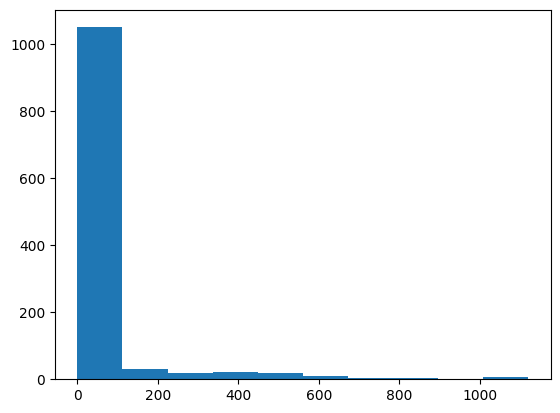

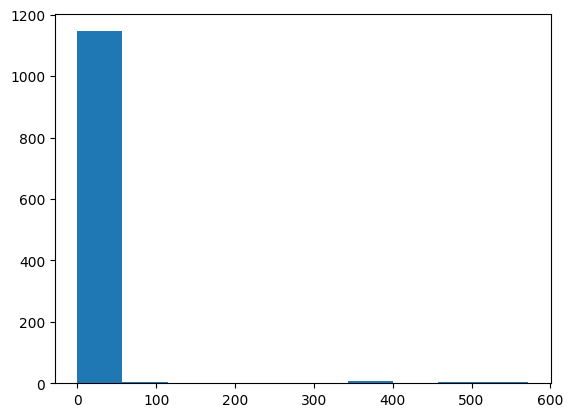

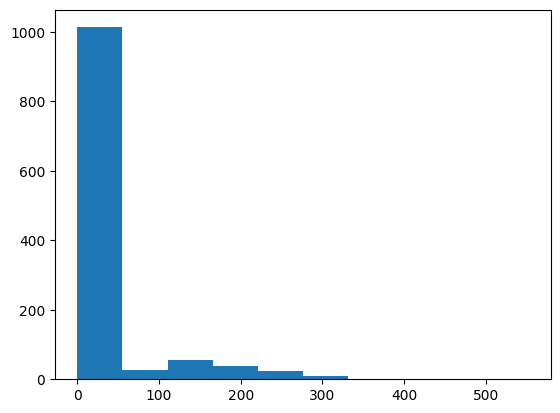

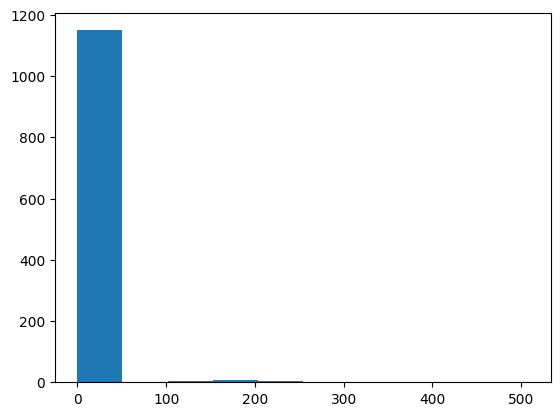

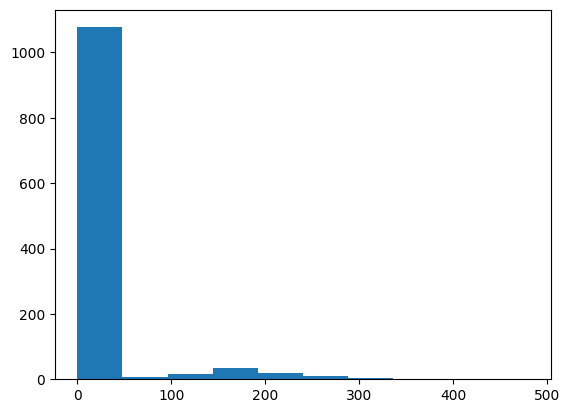

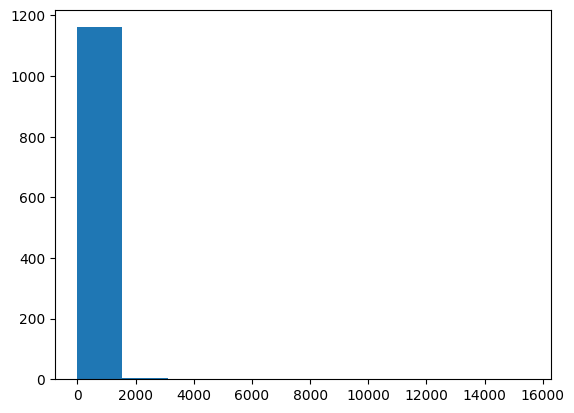

In [442]:
skewed = [
    'BsmtFinSF2', 'LowQualFinSF', 'EnclosedPorch',
    '3SsnPorch', 'ScreenPorch', 'MiscVal'
]

for var in skewed:
    plt.hist(xtrain[var])
    # xtrain[var].histplot()
    plt.show()

Binarizing these skewed variables

In [443]:
skewed = [
    'BsmtFinSF2', 'LowQualFinSF', 'EnclosedPorch',
    '3SsnPorch', 'ScreenPorch', 'MiscVal'
]
# the below can be used but at the same time apply can also be used
# for var in skewed:
#     xtrain[var]= np.where(xtrain[var]== 0,0,1)
#     xtest[var]= np.where(xtest[var]== 0,0,1)


xtrain[skewed]= xtrain[skewed].apply(lambda col: np.where(col== 0, 0, 1))
xtest[skewed]= xtest[skewed].apply(lambda col: np.where(col== 0, 0, 1))

Some categories are qualitative that needs to be coded into numbers that signifies their importance

In [444]:
qual_mappings = {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5, 'Missing': 0, 'NA': 0}

qual_vars = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond',
             'HeatingQC', 'KitchenQual', 'FireplaceQu',
             'GarageQual', 'GarageCond',
            ]

xtrain[qual_vars] = xtrain[qual_vars].apply(lambda col: col.map(qual_mappings))
xtest[qual_vars] = xtest[qual_vars].apply(lambda col: col.map(qual_mappings))

In [445]:
exposure_mappings = {'No': 1, 'Mn': 2, 'Av': 3, 'Gd': 4}

var = 'BsmtExposure'

xtrain[var] = xtrain[var].map(exposure_mappings)
xtest[var] = xtest[var].map(exposure_mappings)

In [446]:
finish_mappings = {'Missing': 0, 'NA': 0, 'Unf': 1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ': 6}

finish_vars = ['BsmtFinType1', 'BsmtFinType2']

for var in finish_vars:
    xtrain[var] = xtrain[var].map(finish_mappings)
    xtest[var] = xtest[var].map(finish_mappings)

In [447]:

garage_mappings = {'Missing': 0, 'NA': 0, 'Unf': 1, 'RFn': 2, 'Fin': 3}

var = 'GarageFinish'

xtrain[var] = xtrain[var].map(garage_mappings)
xtest[var] = xtest[var].map(garage_mappings)

In [448]:
fence_mappings = {'Missing': 0, 'NA': 0, 'MnWw': 1, 'GdWo': 2, 'MnPrv': 3, 'GdPrv': 4}

var = 'Fence'

xtrain[var] = xtrain[var].map(fence_mappings)
xtest[var] = xtest[var].map(fence_mappings)

In [449]:
qual_vars  = qual_vars + finish_vars + ['BsmtExposure','GarageFinish','Fence']

In [450]:
cat_others = [
    var for var in cat_variables if var not in qual_vars
]

len(cat_others)

30

Replacing rare labels with 'rare' tag. This will be done on categorical variables

In [451]:
def rare_labels(df,var, threshold):
    df= df.copy()
    temp= 1.0*df.groupby(var)[var].size()/len(df)
    
    return temp[temp < threshold].index


for var in cat_others:
    rare_label= rare_labels(xtrain, var, 0.01)

    print(var, rare_label)

    xtrain[var] = np.where(~xtrain[var].isin(rare_label),xtrain[var], 'rare' )

    xtest[var] = np.where(~xtest[var].isin(rare_label),xtest[var], 'rare' )

MSZoning Index(['C (all)'], dtype='object', name='MSZoning')
Street Index(['Grvl'], dtype='object', name='Street')
Alley Index([], dtype='object', name='Alley')
LotShape Index(['IR3'], dtype='object', name='LotShape')
LandContour Index([], dtype='object', name='LandContour')
Utilities Index(['NoSeWa'], dtype='object', name='Utilities')
LotConfig Index(['FR3'], dtype='object', name='LotConfig')
LandSlope Index([], dtype='object', name='LandSlope')
Neighborhood Index(['Blueste', 'NPkVill', 'Veenker'], dtype='object', name='Neighborhood')
Condition1 Index(['PosA', 'RRAe', 'RRNe', 'RRNn'], dtype='object', name='Condition1')
Condition2 Index(['Artery', 'Feedr', 'PosA', 'PosN', 'RRAe'], dtype='object', name='Condition2')
BldgType Index([], dtype='object', name='BldgType')
HouseStyle Index(['2.5Fin', '2.5Unf'], dtype='object', name='HouseStyle')
RoofStyle Index(['Flat', 'Gambrel', 'Mansard', 'Shed'], dtype='object', name='RoofStyle')
RoofMatl Index(['Membran', 'Metal', 'Roll', 'Tar&Grv', 'WdS

Finally the values have been fixed. We have so far imputed null values, added value to categorical columns that signal importance, added rare labels. Its time for encoding for categorical variables

In [452]:
# this function will assign discrete values to the strings of the variables,
# so that the smaller value corresponds to the category that shows the smaller
# mean house sale price

In [466]:
def replace_categorical_with_values(xtrain,xtest, ytrain,var, target):

    df= pd.concat([xtrain, ytrain], axis=1)

    ordered_labels = df.groupby(var)[target].mean().sort_values().index

    mapping_label = {k:i for i,k in enumerate(ordered_labels, 0)}
    print(var,mapping_label)
    print()
    
    xtrain[var]= xtrain[var].map(mapping_label)
    xtest[var]= xtest[var].map(mapping_label)

    return xtrain, xtest



In [467]:
for var in cat_others:
    replace_categorical_with_values(xtrain,xtest,ytrain, var,'SalePrice')

MSZoning {0: 0, 1: 1, 2: 2, 3: 3, 4: 4}

Street {'rare': 0, 'Pave': 1}

Alley {'Grvl': 0, 'Pave': 1, 'missing_value': 2}

LotShape {'Reg': 0, 'IR1': 1, 'rare': 2, 'IR2': 3}

LandContour {'Bnk': 0, 'Lvl': 1, 'Low': 2, 'HLS': 3}

Utilities {'rare': 0, 'AllPub': 1}

LotConfig {'rare': 0, 'Inside': 1, 'Corner': 2, 'FR2': 3, 'CulDSac': 4}

LandSlope {'Gtl': 0, 'Mod': 1, 'Sev': 2}

Neighborhood {'IDOTRR': 0, 'MeadowV': 1, 'BrDale': 2, 'Edwards': 3, 'BrkSide': 4, 'OldTown': 5, 'Sawyer': 6, 'SWISU': 7, 'NAmes': 8, 'Mitchel': 9, 'rare': 10, 'SawyerW': 11, 'NWAmes': 12, 'Gilbert': 13, 'Blmngtn': 14, 'CollgCr': 15, 'Crawfor': 16, 'ClearCr': 17, 'Somerst': 18, 'Timber': 19, 'StoneBr': 20, 'NridgHt': 21, 'NoRidge': 22}

Condition1 {'Artery': 0, 'Feedr': 1, 'Norm': 2, 'RRAn': 3, 'rare': 4, 'PosN': 5}

Condition2 {'rare': 0, 'Norm': 1}

BldgType {'2fmCon': 0, 'Twnhs': 1, 'Duplex': 2, 'TwnhsE': 3, '1Fam': 4}

HouseStyle {'1.5Unf': 0, 'SFoyer': 1, '1.5Fin': 2, 'SLvl': 3, '1Story': 4, 'rare': 5, '2Story

In [460]:
def replace_categorical_with_values(xtrain, xtest, ytrain, var, target):
    # Concatenate xtrain, xtest, and ytrain
    df_train = pd.concat([xtrain, ytrain], axis=1)
    df_test = xtest.copy()  # Create a copy of xtest

    # Calculate mean target value for each category of var
    mean_target = df_train.groupby(var)[target].mean().to_dict()

    print(var, mean_target)

    # Map mean target values to categories in both train and test datasets
    # xtrain[var] = xtrain[var].map(mean_target)
    # xtest[var] = xtest[var].map(mean_target)

    # return xtrain, xtest


Let us check whether we have monotonic relationship between variables in each column and SalePrice

In [474]:
import seaborn as sns

In [475]:
def check_relationship(xtrain,ytrain, var):
    df_var= pd.concat([xtrain,ytrain], axis=1)

    temp= df_var.groupby(var)['SalePrice'].mean() 
    sns.barplot(temp)
    plt.show()

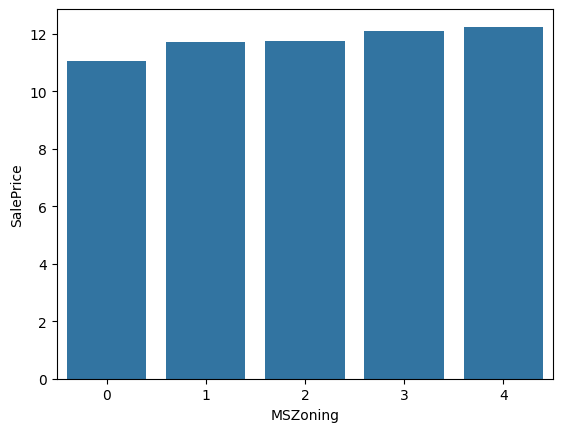

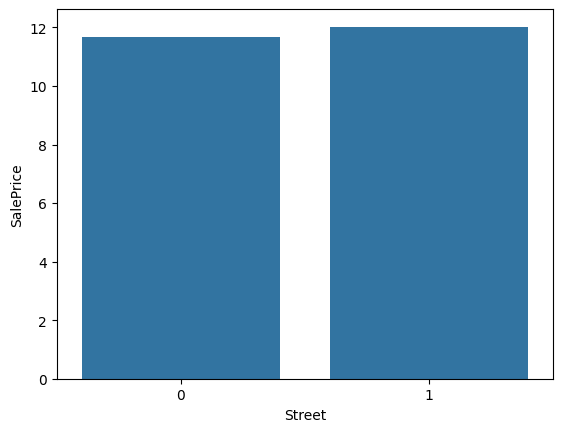

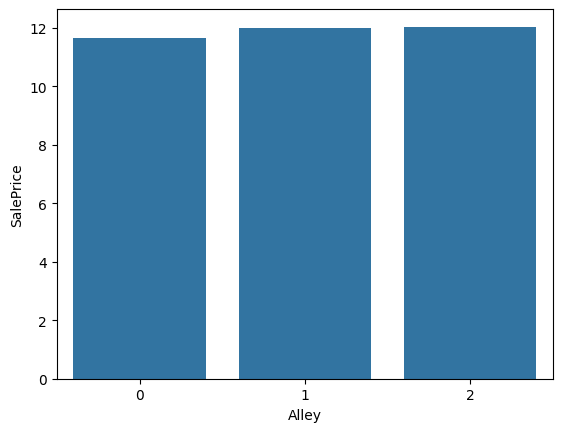

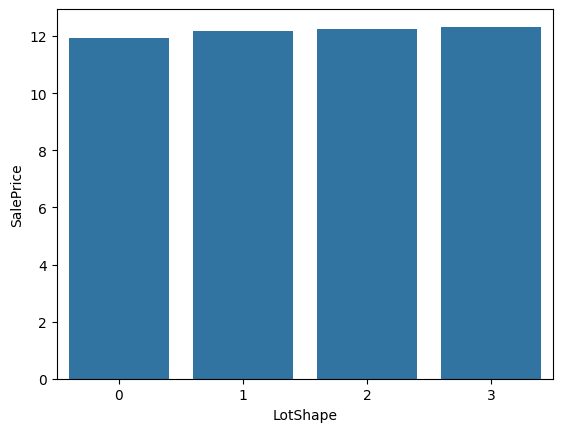

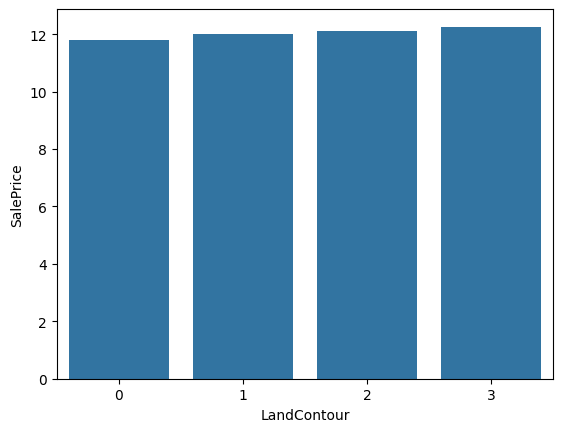

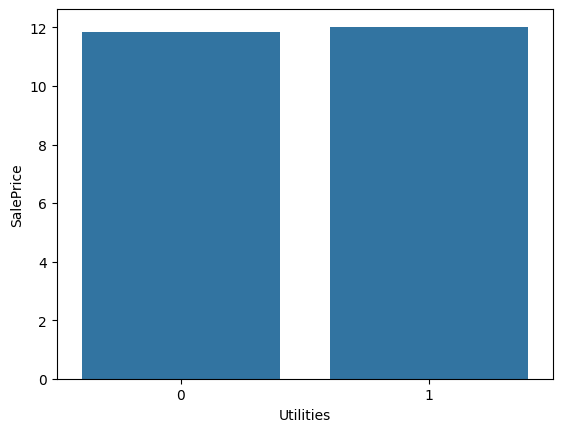

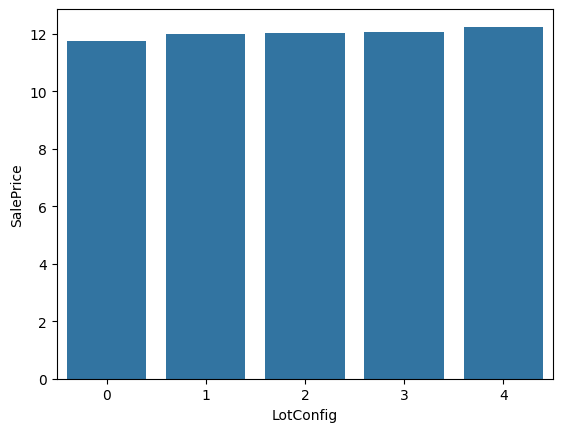

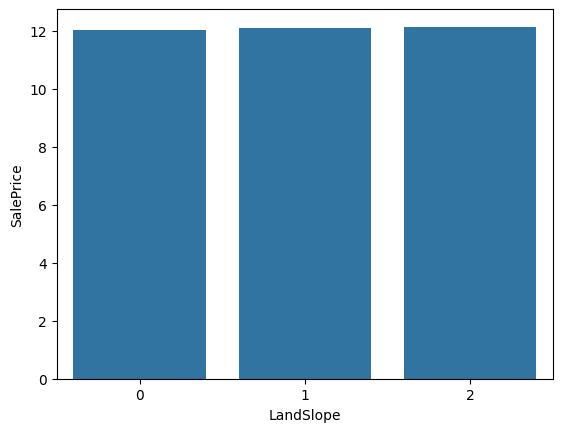

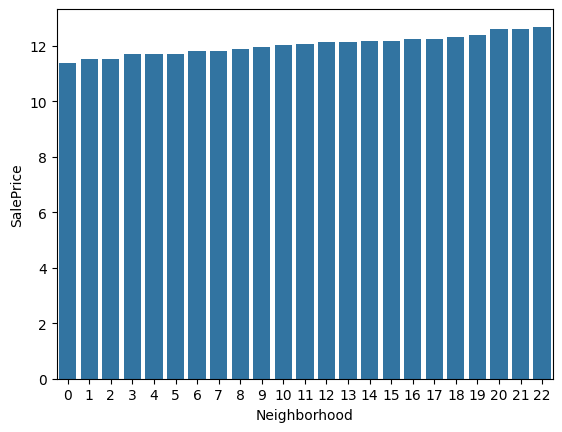

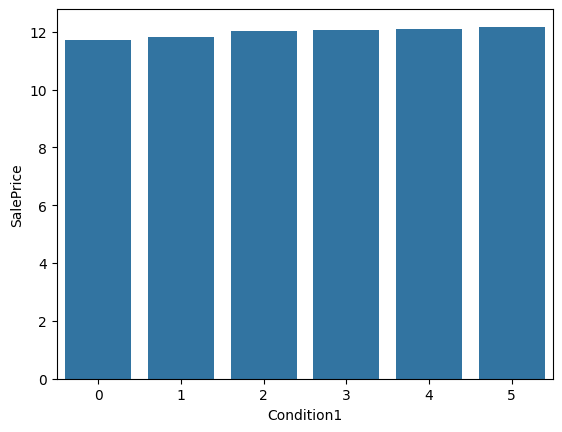

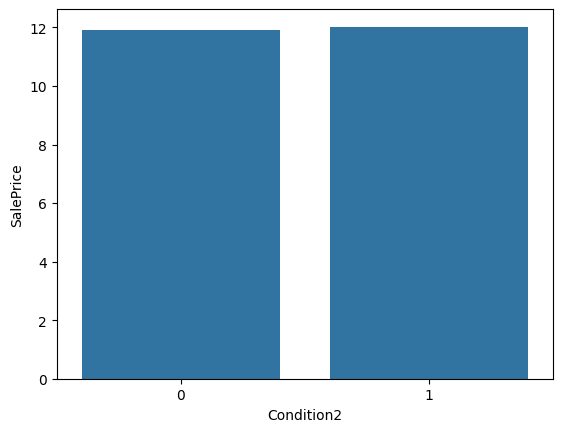

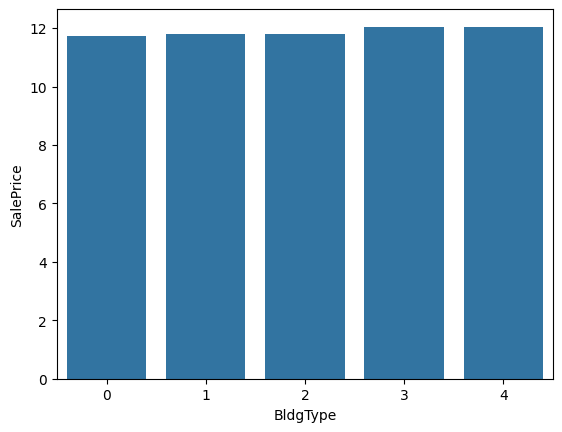

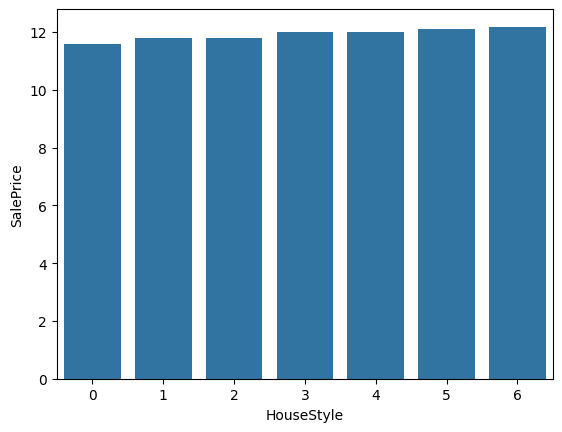

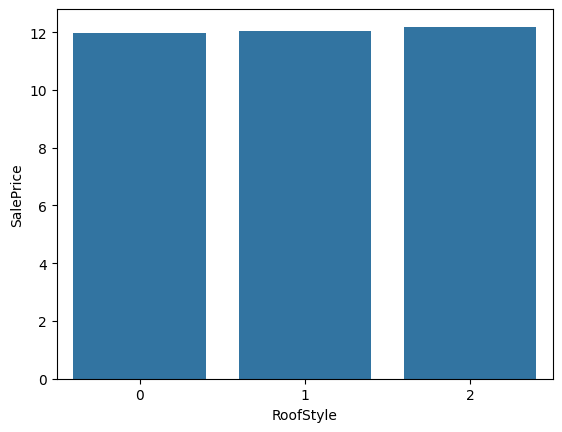

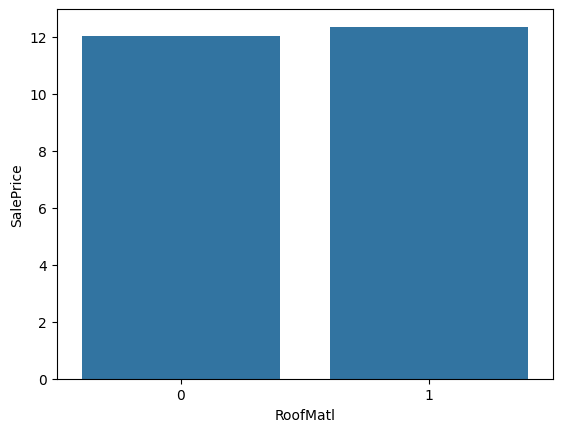

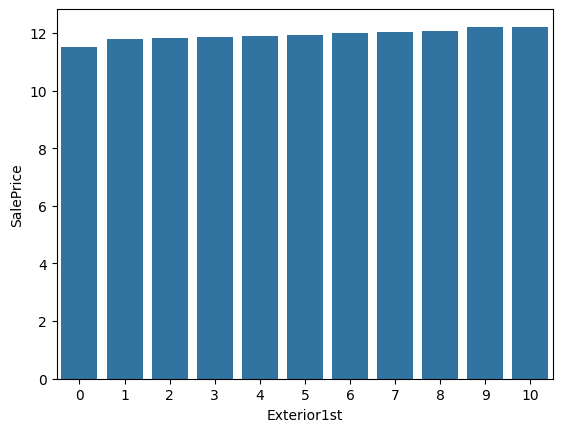

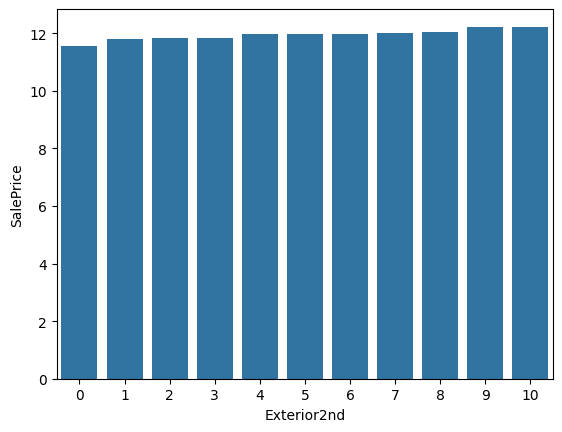

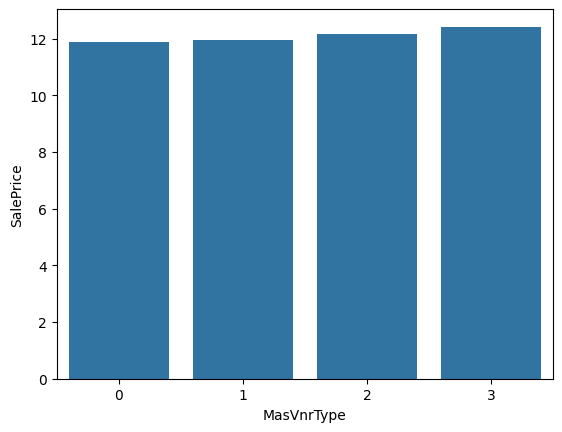

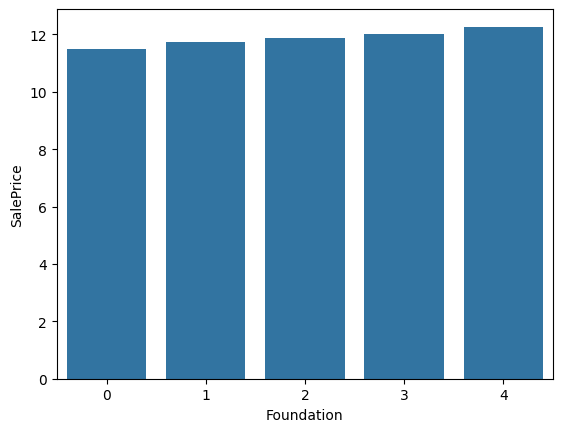

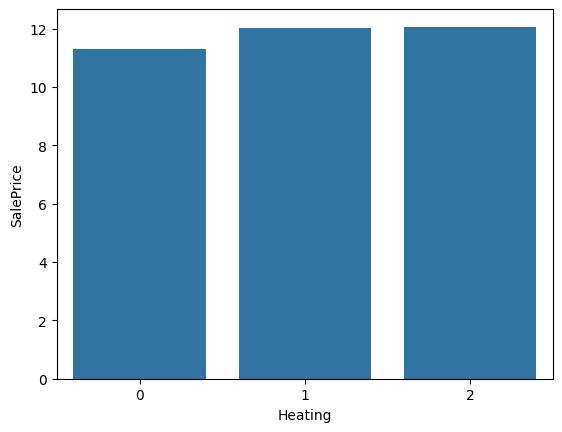

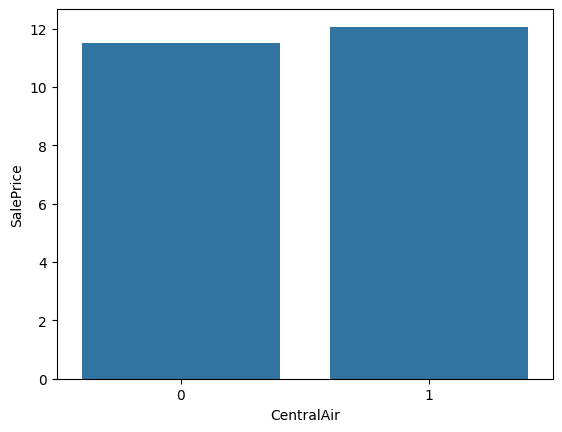

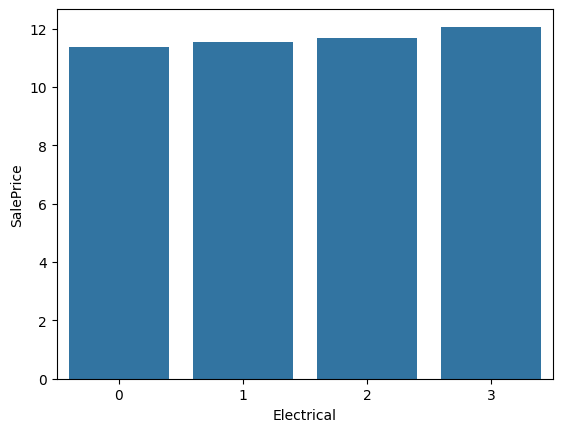

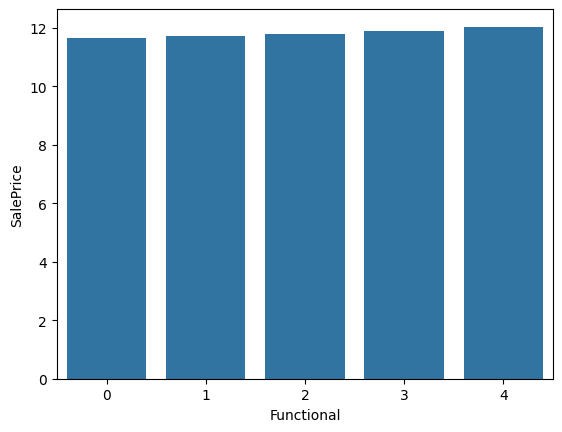

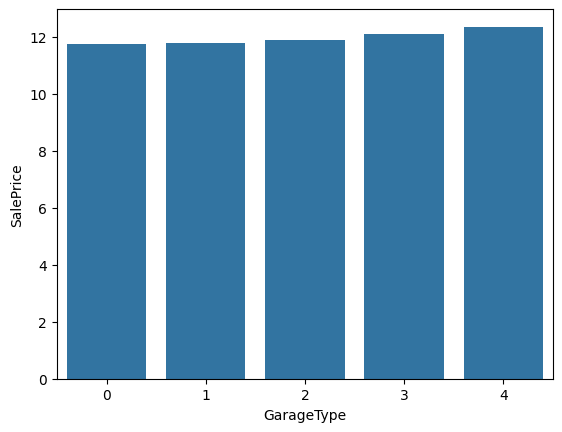

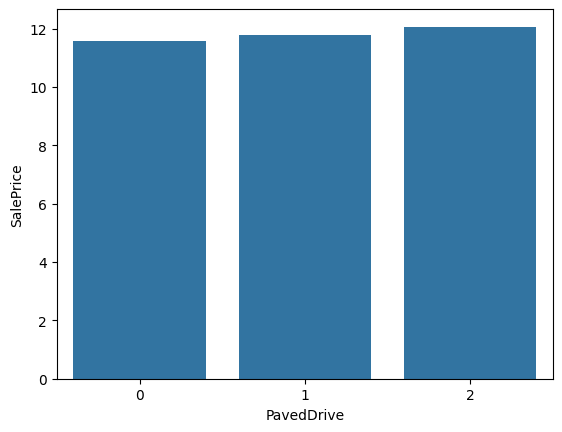

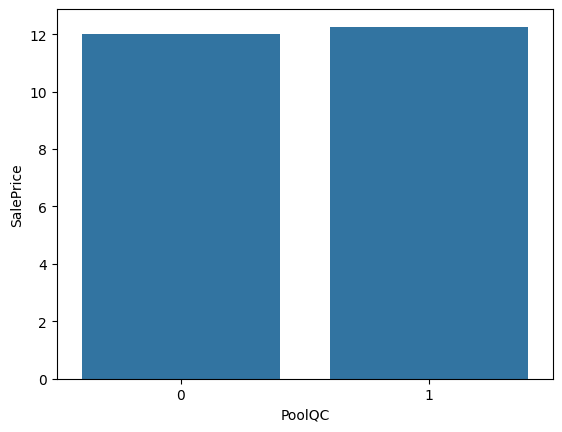

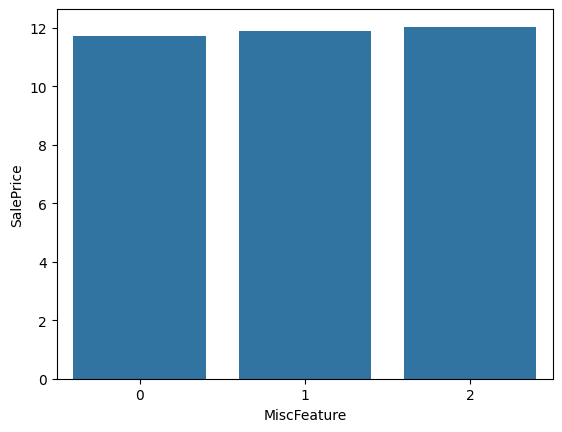

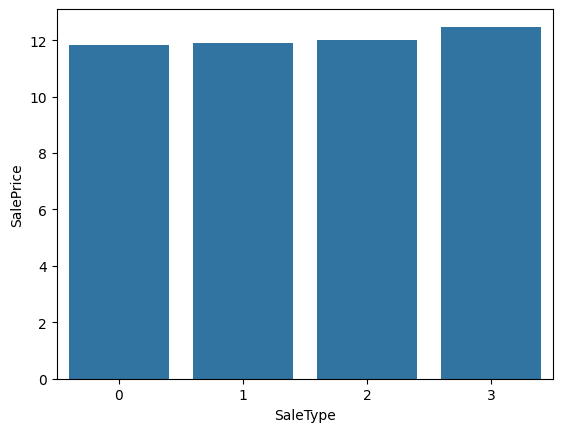

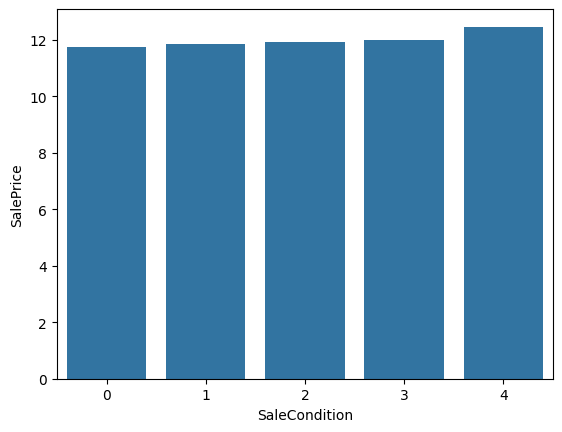

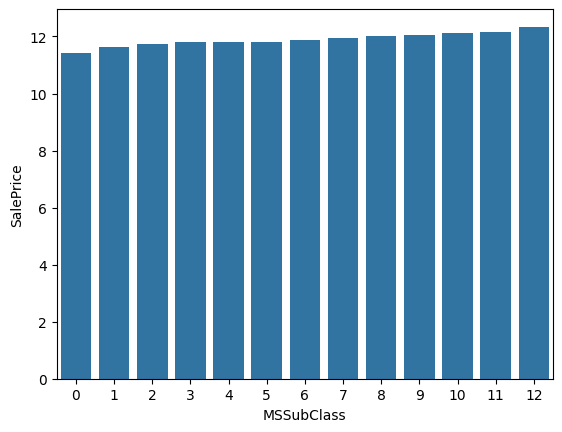

In [476]:
for var in cat_others:
    check_relationship(xtrain,ytrain, var)

Feature Scaling: Required for linear models

In [477]:
# create scaler

scaler= MinMaxScaler()

scaler.fit(xtrain)


xtrain= pd.DataFrame(scaler.transform(xtrain), columns=xtrain.columns)
xtest= pd.DataFrame(scaler.transform(xtest), columns=xtest.columns)

In [478]:
xtrain.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,GarageYrBltna,LotFrontagena,MasVnrAreana
0,0.75,0.75,0.538660,0.422880,1.0,1.0,0.000000,0.333333,1.0,0.25,0.0,0.954545,0.4,1.0,1.0,0.666667,0.888889,0.50,0.000000,0.016393,1.0,0.0,0.9,0.9,0.666667,0.28250,1.000000,0.50,1.00,1.000000,0.666667,0.666667,1.0,0.021239,0.0,0.0,0.823967,0.568309,0.5,1.00,1.0,1.0,0.749329,0.0,0.0,0.644108,0.000000,0.0,0.666667,0.0,0.375,0.333333,0.666667,0.583333,1.0,0.333333,0.75,0.75,0.000000,0.0,0.75,0.556835,0.5,0.5,1.0,0.000000,0.197441,0.0,0.0,1.0,0.0,0.0,NaN,1.0,0.0,0.545455,0.25,1.000000,1.00,0.0,0.0,0.0
1,0.75,0.75,0.388581,0.311742,1.0,1.0,0.000000,0.333333,1.0,0.25,0.0,0.363636,1.0,1.0,1.0,0.666667,0.444444,0.50,0.345588,0.786885,1.0,0.0,0.3,0.3,0.000000,0.00000,0.333333,0.50,0.50,0.333333,0.666667,0.000000,0.0,0.000000,0.0,0.0,0.415235,0.278852,0.5,0.75,0.0,1.0,0.434020,0.0,0.0,0.373074,0.000000,0.0,0.333333,0.0,0.250,0.333333,0.333333,0.250000,1.0,0.000000,NaN,0.25,0.439252,0.0,0.25,0.221583,0.5,0.5,1.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,NaN,1.0,0.0,0.636364,0.75,0.666667,0.75,0.0,0.0,0.0
2,0.00,0.75,0.495064,0.448860,1.0,0.0,0.333333,1.000000,1.0,0.25,0.0,0.727273,0.4,1.0,1.0,0.666667,0.444444,0.75,0.647059,0.065574,0.0,0.0,0.2,0.2,0.000000,0.00000,0.333333,0.75,0.25,0.666667,0.666667,0.000000,0.8,0.315487,0.0,0.0,0.075708,0.273238,0.5,1.00,1.0,1.0,0.467252,0.0,0.0,0.401640,0.333333,0.0,0.333333,0.0,0.250,0.333333,0.333333,0.250000,1.0,0.000000,NaN,0.25,0.822430,0.0,0.50,0.310791,0.5,0.5,1.0,0.000000,0.000000,1.0,0.0,0.0,0.0,0.0,NaN,1.0,0.0,0.636364,0.75,0.666667,0.75,0.0,0.0,0.0
3,0.75,0.75,0.443592,0.447467,1.0,1.0,0.333333,0.333333,1.0,1.00,0.0,0.409091,0.4,1.0,1.0,0.666667,0.777778,0.50,0.044118,0.114754,1.0,0.0,0.9,0.9,0.666667,0.09250,0.666667,0.50,1.00,0.666667,0.666667,0.000000,1.0,0.538938,0.0,0.0,0.162564,0.489083,0.5,1.00,1.0,1.0,0.714467,0.0,0.0,0.614140,0.333333,0.0,0.666667,0.0,0.375,0.333333,0.666667,0.416667,1.0,0.666667,0.75,0.75,0.056075,0.5,0.75,0.616547,0.5,0.5,1.0,0.203804,0.107861,0.0,0.0,0.0,0.0,0.0,NaN,1.0,0.0,0.545455,0.50,0.666667,0.75,0.0,1.0,0.0
4,0.75,0.75,0.638922,0.453824,1.0,1.0,0.333333,0.333333,1.0,0.50,0.0,0.681818,0.4,1.0,1.0,0.666667,0.666667,0.50,0.036765,0.081967,0.0,0.0,1.0,1.0,0.666667,0.09375,0.666667,0.50,1.00,0.666667,0.666667,0.000000,0.0,0.000000,0.0,0.0,0.715745,0.480661,0.5,1.00,1.0,1.0,0.674041,0.0,0.0,0.579391,0.000000,0.0,0.666667,0.0,0.375,0.333333,0.666667,0.333333,1.0,0.333333,0.50,0.75,0.046729,0.5,0.75,0.606475,0.5,0.5,1.0,0.635870,0.148080,0.0,0.0,0.0,0.0,0.0,NaN,1.0,0.0,0.000000,0.00,0.666667,0.75,0.0,0.0,0.0


In [480]:
xtrain.to_csv('xtrain.csv', index= False)

xtest.to_csv('xtest.csv',index= False)

ytrain.to_csv('ytrain.csv', index= False)

ytest.to_csv('ytest.csv',index= False)

In [479]:
joblib.dump(scaler, 'minmax_scaler.joblib')

['minmax_scaler.joblib']